In [1]:
from tensorflow.keras.applications import VGG19

def import_vgg19():
    # Load pre-trained VGG19 model
    model = VGG19(weights='imagenet', include_top=True)
    return model

model = import_vgg19()
print(model.summary())





Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

Image 1: 
1/1 [==============================] - 1s 1s/step
Top Predictions:
1: soccer_ball (0.42)
2: ballplayer (0.37)
3: baseball (0.17)


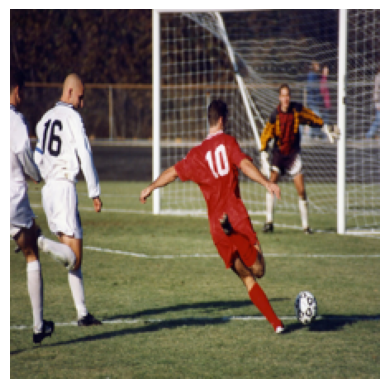

Image 2: 
1/1 [==============================] - 1s 582ms/step
Top Predictions:
1: mountain_bike (0.83)
2: bicycle-built-for-two (0.02)
3: alp (0.01)


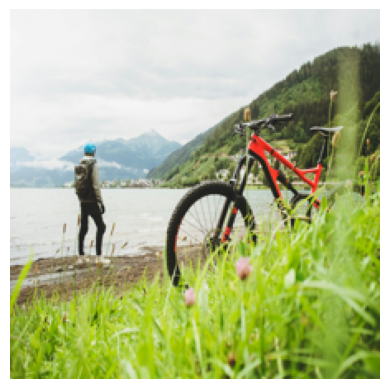

Image 3: 
1/1 [==============================] - 1s 596ms/step
Top Predictions:
1: soccer_ball (0.73)
2: football_helmet (0.23)
3: rugby_ball (0.02)


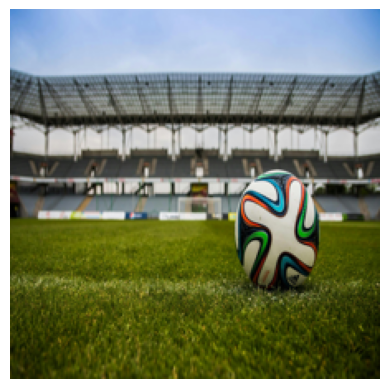

Image 4: 
1/1 [==============================] - 1s 821ms/step
Top Predictions:
1: scuba_diver (0.19)
2: snorkel (0.14)
3: tub (0.11)


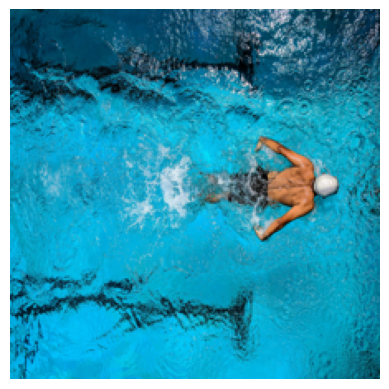

Image 5: 
1/1 [==============================] - 1s 602ms/step
Top Predictions:
1: bicycle-built-for-two (0.57)
2: mountain_bike (0.42)
3: crash_helmet (0.01)


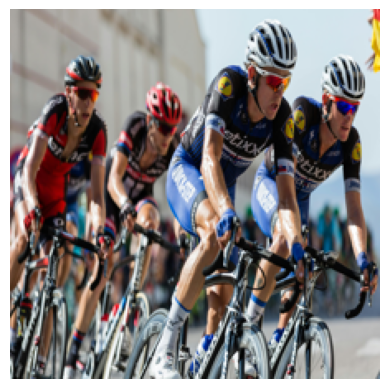

Image 6: 
1/1 [==============================] - 1s 681ms/step
Top Predictions:
1: football_helmet (1.00)
2: ballplayer (0.00)
3: soccer_ball (0.00)


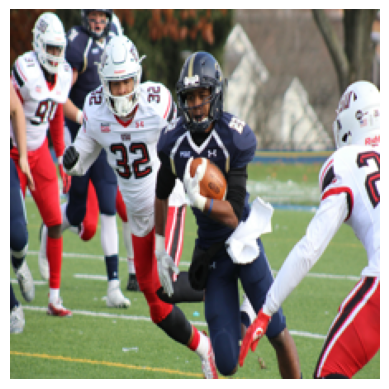

Image 7: 
1/1 [==============================] - 1s 665ms/step
Top Predictions:
1: racket (0.28)
2: wooden_spoon (0.15)
3: tennis_ball (0.13)


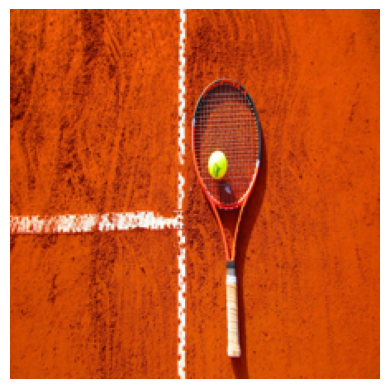

Image 8: 
1/1 [==============================] - 1s 559ms/step
Top Predictions:
1: basketball (0.49)
2: bikini (0.11)
3: balance_beam (0.08)


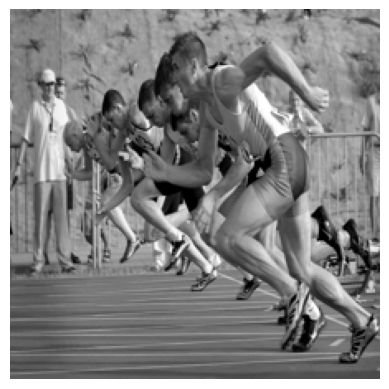

Image 9: 
1/1 [==============================] - 0s 457ms/step
Top Predictions:
1: ski (1.00)
2: alp (0.00)
3: snowmobile (0.00)


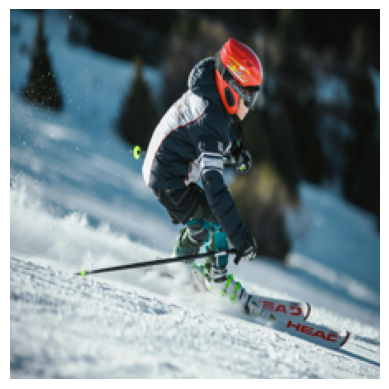

Image 10: 
1/1 [==============================] - 0s 425ms/step
Top Predictions:
1: puck (0.38)
2: unicycle (0.12)
3: knee_pad (0.11)


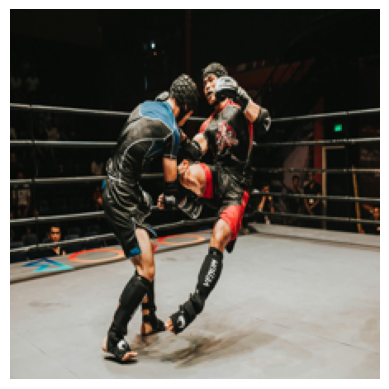

In [2]:

import os
import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions



# Function to preprocess the image and make predictions
def predict_image(img_path):
    # Load and preprocess the image
    img = Image.open(img_path)
    img = img.resize((224, 224))  # VGG19 input size
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    # Print the top three predictions
    print("Top Predictions:")
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i + 1}: {label} ({score:.2f})")

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Path to the folder containing images
folder_path = r'C:\Users\varun\OneDrive\Desktop\Assignment\8321\Lab 3\images'

# Iterate over the images in the folder
for i, filename in enumerate(os.listdir(folder_path), start=1):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print(f"Image {i}: ")
        img_path = os.path.join(folder_path, filename)
        predict_image(img_path)


 Layer: block5_conv1, Filter number 457


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Iteration 100, Loss: 256.4434814453125


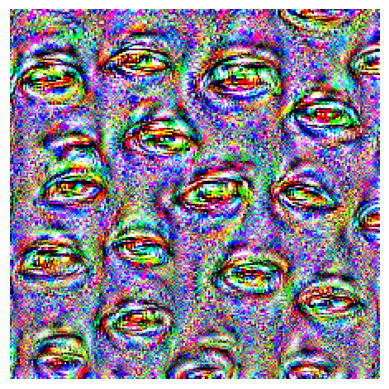

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Iteration 200, Loss: 838.5681762695312


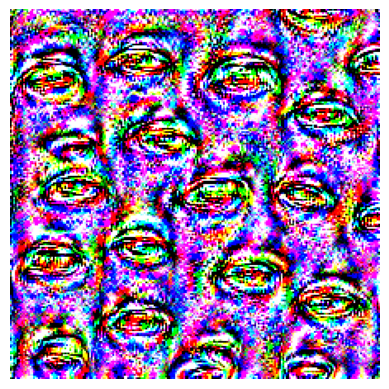

KeyboardInterrupt: 

In [3]:
import tensorflow as tf
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
import random

# Selecting a layer and channel to visualize
layer_name = ['block5_conv1']


for current_layer in range(len(layer_name)):
    # Isolate the output of interest and create new model

    layer_output = model.get_layer(layer_name[current_layer]).output
    new_model = models.Model(inputs=model.input, outputs=layer_output)
    
    
    # Select the filter
    filter_index = 457
    
    
    # Define a function to compute the loss
    def compute_loss(input_image, filter_index):
        activation = new_model(input_image)
        return tf.reduce_mean(activation[:, :, :, filter_index])

    # Define a function to perform gradient ascent
    @tf.function
    def gradient_ascent_step(input_image, filter_index, learning_rate=0.01):
        with tf.GradientTape() as tape:
            tape.watch(input_image)
            loss = compute_loss(input_image, filter_index)
        grads = tape.gradient(loss, input_image)
        grads /= tf.maximum(tf.math.reduce_std(grads), 1e-8)  
        input_image += learning_rate * grads
        return input_image, loss

    # Initialize an input image
    input_image = tf.random.uniform((1, 224, 224, 3))

    print(f" Layer: {layer_name[current_layer]}, Filter number {filter_index}")

    # Run gradient ascent for a number of iterations
    list = [100, 200, 500, 1000, 2000]
    for j in list:
        for i in range(j):

            input_image, loss = gradient_ascent_step(input_image, filter_index)
            if i == j-1:  # Show the generated image 
                # Convert the resulting image to a numpy array
                print(f"Iteration {i+1}, Loss: {loss.numpy()}")
                generated_image = input_image.numpy().squeeze()
                # Display the generated image
                plt.imshow(generated_image)
                plt.axis('off')
                plt.show()

            
   

In [ ]:
import tensorflow as tf
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt

# Selecting a layer and channel to visualize
layer_name = ['block5_conv1']

for current_layer in range(len(layer_name)):
    # Isolate the output of interest and create a new model
    layer_output = model.get_layer(layer_name[current_layer]).output
    new_model = models.Model(inputs=model.input, outputs=layer_output)

    # Select the filter
    filter_index = 457

    # Define a function to compute the loss
    def compute_loss(input_image, filter_index):
        activation = new_model(input_image)
        return tf.reduce_mean(activation[:, :, :, filter_index])

    # Define a function to perform gradient ascent
    @tf.function
    def gradient_ascent_step(input_image, filter_index, learning_rate=0.01):
        with tf.GradientTape() as tape:
            tape.watch(input_image)
            loss = compute_loss(input_image, filter_index)
        grads = tape.gradient(loss, input_image)
        grads /= tf.maximum(tf.math.reduce_std(grads), 1e-8)
        input_image += learning_rate * grads
        return input_image, loss

    # Initialize an input image
    input_image = tf.random.uniform((1, 224, 224, 3))

    print(f"Layer: {layer_name[current_layer]}, Filter number {filter_index}")

    # Run gradient ascent for a number of iterations
    iterations = [1000]
    for j in iterations:
        for i in range(j):
            input_image, loss = gradient_ascent_step(input_image, filter_index)
            if i == j-1:  # Show the generated image 
                # Convert the resulting image to a numpy array
                generated_image = input_image.numpy().squeeze()
                # Normalize the image for visualization
                generated_image -= generated_image.mean()
                generated_image /= generated_image.std() + 1e-5
                generated_image *= 0.1
                generated_image += 0.5
                generated_image = np.clip(generated_image, 0, 1)
                # Display the generated image
                plt.figure(figsize=(8, 8))
                plt.imshow(generated_image, cmap='viridis')
                plt.axis('off')
                plt.title(f"Iteration {i+1}, Loss: {loss.numpy()}")
                plt.show()


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing import image
import json
import sys


# Path to the directory containing the images
images_dir = r'C:\Users\varun\OneDrive\Desktop\Assignment\8321\Lab 3\imagenet\images'

# Load ImageNet class index
imagenet_class_index_path = r'C:\Users\varun\OneDrive\Desktop\Assignment\8321\Lab 3\imagenet\imagenet_class_index.json'
with open(imagenet_class_index_path) as f:
    class_index = json.load(f)


# Define a new model that outputs activations of the desired layer
activation_model = tf.keras.Model(inputs=model.input, outputs=block5_conv1_layer.output)

# Iterate over each directory (class label) in the images directory
for class_label in os.listdir(images_dir):
    class_dir = os.path.join(images_dir, class_label)
    if not os.path.isdir(class_dir):
        continue
    
    # List to store activations for this class
    class_activations = []
    
    # Iterate over each image in the class directory
    for filename in os.listdir(class_dir):
        try:
            img_path = os.path.join(class_dir, filename)
            img = image.load_img(img_path, target_size=(224, 224))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)

            # Get activations from block5_conv1 layer
            activations = activation_model.predict(x)
            
            # While identifying the image class that activated the chosen filter the most, 
            # I took average of activation of each image class          
            
            # Append activations from filter 457
            class_activations.append(activations[..., 457])
        except Exception as e:
            pass
    
    # Compute average activation for this class
    avg_activation = np.mean(class_activations)
    class_activations_dict[class_label] = avg_activation

# And now, I sorted the class_activation_dict that I created to store the activations for all the images
# that I passed through the pre trained VGG19 model   

# Select top 5 classes with highest average activation
top_classes = sorted(class_activations_dict, key=class_activations_dict.get, reverse=True)[:5]





In [ ]:
images_dir = r'C:\Users\varun\OneDrive\Desktop\Assignment\8321\Lab 3\imagenet\images'

# This was just some code to debug by printing the images that activated the 
# Block5, Conv1 filter - 457 the most

combined_paths = []
for name in top_classes:
    combined_paths.append(os.path.join(images_dir, name))

print(combined_paths)


In [ ]:
import os
import json
import matplotlib.pyplot as plt

json_path = r'C:\Users\varun\OneDrive\Desktop\Assignment\8321\Lab 3\imagenet\imagenet_class_index.json'

# Load the JSON file into a dictionary, this json contains the class name, the dataset that I selected to train
# above model was a mini version of ImageNet that I downloaded from Kaggle(link the references)

with open(json_path) as f:
    class_index = json.load(f)
    
# the names of all the directories didn't make any sense so getting equivalent class names to print for the top classes.

# Function to get class name from directory name
def get_class_name(identifier):
    for key, value in class_index.items():
        if value[0] == identifier:
            return value[1]
    return 'Unknown'

# Loop through combined paths
for path in combined_paths:
    class_id = os.path.basename(path)  # Extract class ID from the directory name
    
    class_name = get_class_name(class_id)  # Get class name from the JSON file
    print(f"\nClass Name: {class_name}")
    print(f"\nClass ID: {class_id}")
    
    # List images in the directory
    images = os.listdir(path)
    
    # number of images for each class in this dataset were in the range (2,5),
    # this is the reason that I chose highest average activation over taking the total sum of activation 
    # while chosing the image class,
    # so limiting to 2 images for the top classes.
    
    for idx, image_file in enumerate(images[:2]):  # Limit to 2 images per class
        image_path = os.path.join(path, image_file)
        img = plt.imread(image_path)
        
        # Display the image
        plt.imshow(img)
        plt.title(f"Image {idx+1}")
        plt.axis('off')
        plt.show()


# Hypothesis
lips or eyes, concave shape observed, in the image generated using gradient ascent. 

In [ ]:
import os
import numpy as np
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

# Load the pre-trained VGG19 model
model = VGG19(weights='imagenet', include_top=True)

# Function to preprocess the image and make predictions
def predict_image(img_path):
    # Load and preprocess the image
    img = Image.open(img_path)
    img = img.resize((224, 224))  # VGG19 input size
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions
    # predictions = model.predict(img_array)
    # decoded_predictions = decode_predictions(predictions, top=3)[0]

    # Print the top three predictions
    # print("Top Predictions:")
    # for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    #    print(f"{i + 1}: {label} ({score:.2f})")

    # Pass the image through filter 457 in block 5 conv 1
    filter_activations = pass_through_filter457(img_array)
    visualize_top_and_bottom_channels(activations)
    # Visualize the top 10 channels of the activations
    # visualize_top10_channels(filter_activations)

    # Display the image
    # plt.imshow(img)
    # plt.axis('off')
    # plt.show()

# Function to pass the image through filter 457 in block 5 conv 1
def pass_through_filter457(image):
    # Define a new model that outputs activations of block 5 conv 1
    block5_conv1_activation_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('block5_conv1').output)
    # Get activations from block 5 conv 1
    activations = block5_conv1_activation_model.predict(image)
    # Extract activations of filter 457
    filter_activations = activations[..., 457]
    return filter_activations

import numpy as np
import matplotlib.pyplot as plt



def visualize_top_and_bottom_channels(activations):
    # Initialize an empty list to store channel activations
    channel_activations = []
    
    # Iterate over the activations
    for idx in range(activations.shape[-1]):
        # Extract a single channel activation
        channel_activation = activations[..., idx]
        
        # Append the channel activation to the list
        channel_activations.append((idx, np.mean(channel_activation)))
    
    # Sort the channel activations by mean activation value
    sorted_channel_activations = sorted(channel_activations, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 channel indices
    top10_indices = [idx for idx, _ in sorted_channel_activations[:10]]
    bottom10_indices = [idx for idx, _ in sorted_channel_activations[-10:]]  # Extract bottom 10 indices
    
    # Visualize the top 10 channels
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    fig.suptitle('Top and Bottom Channels in Filter 457 (Block 5 Conv1)', fontsize=16)
    
    # Visualize top 10 channels
    for i, idx in enumerate(top10_indices):
        row, col = divmod(i, 5)  # Calculate row and column indices for subplot
        channel_activation = activations[..., idx].reshape(activations.shape[1:-1])  # Reshape activation
        im = axes[row, col].imshow(channel_activation, cmap='viridis')  # Display activation map
        axes[row, col].set_title(f'Top Channel {idx+1}')  # Set title
        axes[row, col].axis('off')  # Turn off axis
        fig.colorbar(im, ax=axes[row, col], shrink=0.6)  # Add colorbar with shrink factor

    # Visualize bottom 10 channels
    for i, idx in enumerate(bottom10_indices):
        row, col = divmod(i, 5)  # Calculate row and column indices for subplot
        channel_activation = activations[..., idx].reshape(activations.shape[1:-1])  # Reshape activation
        im = axes[row+2, col].imshow(channel_activation, cmap='viridis')  # Display activation map, start from row 2
        axes[row+2, col].set_title(f'Bottom Channel {idx+1}')  # Set title
        axes[row+2, col].axis('off')  # Turn off axis
        fig.colorbar(im, ax=axes[row+2, col], shrink=0.6)  # Add colorbar with shrink factor

    # Adjust aspect ratio to match the activation maps
    for ax in axes.flat:
        ax.set_aspect(aspect='auto')

    plt.tight_layout()
    plt.show()




# Path to the folder containing images
folder_path = r'C:\Users\varun\OneDrive\Desktop\Assignment\8321\Lab 3\images'

# Iterate over the images in the folder
for i, filename in enumerate(os.listdir(folder_path), start=1):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print(f"Image {i}: ")
        img_path = os.path.join(folder_path, filename)
        predict_image(img_path)
        
        


In [ ]:
import os
import numpy as np
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

# Load the pre-trained VGG19 model
model = VGG19(weights='imagenet', include_top=True)

# Function to preprocess the image and make predictions
def predict_image(img_path):
    # Load and preprocess the image
    img = Image.open(img_path)
    img = img.resize((224, 224))  # VGG19 input size
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions
    # predictions = model.predict(img_array)
    # decoded_predictions = decode_predictions(predictions, top=3)[0]

    # Print the top three predictions
    # print("Top Predictions:")
    # for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    #    print(f"{i + 1}: {label} ({score:.2f})")

    # Pass the image through filter 457 in block 5 conv 1
    filter_activations = pass_through_filter457(img_array)
    visualize_top_and_bottom_channels(activations)
    # Visualize the top 10 channels of the activations
    # visualize_top10_channels(filter_activations)

    # Display the image
    # plt.imshow(img)
    # plt.axis('off')
    # plt.show()

# Function to pass the image through filter 457 in block 5 conv 1
def pass_through_filter457(image):
    # Define a new model that outputs activations of block 5 conv 1
    block5_conv1_activation_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('block5_conv1').output)
    # Get activations from block 5 conv 1
    activations = block5_conv1_activation_model.predict(image)
    # Extract activations of filter 457
    filter_activations = activations[..., 457]
    return filter_activations

import numpy as np
import matplotlib.pyplot as plt



def visualize_top_and_bottom_channels(activations):
    # Initialize an empty list to store channel activations
    channel_activations = []
    
    # Iterate over the activations
    for idx in range(activations.shape[-1]):
        # Extract a single channel activation
        channel_activation = activations[..., idx]
        
        # Append the channel activation to the list
        channel_activations.append((idx, np.mean(channel_activation)))
    
    # Sort the channel activations by mean activation value
    sorted_channel_activations = sorted(channel_activations, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 channel indices
    top10_indices = [idx for idx, _ in sorted_channel_activations[:10]]
    bottom10_indices = [idx for idx, _ in sorted_channel_activations[-10:]]  # Extract bottom 10 indices
    
    # Visualize the top 10 channels
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    fig.suptitle('Top and Bottom Channels in Filter 457 (Block 5 Conv1)', fontsize=16)
    
    # Visualize top 10 channels
    for i, idx in enumerate(top10_indices):
        row, col = divmod(i, 5)  # Calculate row and column indices for subplot
        channel_activation = activations[..., idx].reshape(activations.shape[1:-1])  # Reshape activation
        im = axes[row, col].imshow(channel_activation, cmap='viridis')  # Display activation map
        axes[row, col].set_title(f'Top Channel {idx+1}')  # Set title
        axes[row, col].axis('off')  # Turn off axis
        fig.colorbar(im, ax=axes[row, col], shrink=0.6)  # Add colorbar with shrink factor

    # Visualize bottom 10 channels
    for i, idx in enumerate(bottom10_indices):
        row, col = divmod(i, 5)  # Calculate row and column indices for subplot
        channel_activation = activations[..., idx].reshape(activations.shape[1:-1])  # Reshape activation
        im = axes[row+2, col].imshow(channel_activation, cmap='viridis')  # Display activation map, start from row 2
        axes[row+2, col].set_title(f'Bottom Channel {idx+1}')  # Set title
        axes[row+2, col].axis('off')  # Turn off axis
        fig.colorbar(im, ax=axes[row+2, col], shrink=0.6)  # Add colorbar with shrink factor

    # Adjust aspect ratio to match the activation maps
    for ax in axes.flat:
        ax.set_aspect(aspect='auto')

    plt.tight_layout()
    plt.show()




# Path to the folder containing images
folder_path = r'C:\Users\varun\OneDrive\Desktop\Assignment\8321\Lab 3\images'

# Iterate over the images in the folder
for i, filename in enumerate(os.listdir(folder_path), start=1):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print(f"Image {i}: ")
        img_path = os.path.join(folder_path, filename)
        predict_image(img_path)
        
        


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input
from PIL import Image

# Load the pre-trained VGG19 model
model = tf.keras.applications.VGG19(weights='imagenet', include_top=False)





# Function to preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize image to VGG19 input size
    img_array = np.array(img)
    img_array = preprocess_input(img_array)  # Preprocess input for VGG19
    return img_array

# Function to compute loss and gradient ascent
def gradient_ascent(image, top_channels, iterations=100, step=1.0):
    image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)  # Convert NumPy array to TensorFlow tensor
    for _ in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(image_tensor)
            activations = pass_through_filter457(image_tensor)
            loss = tf.reduce_mean([activations[..., idx] for idx in top_channels])
        
        gradients = tape.gradient(loss, image_tensor)
        gradients /= tf.maximum(tf.reduce_mean(tf.abs(gradients)), 1e-6)
        image_tensor += gradients * step
    
    return image_tensor.numpy()  # Convert the TensorFlow tensor back to NumPy array

# Function to pass the image through filter 457 in block 5 conv 1
def pass_through_filter457(activations):
    block5_conv1_activation_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('block5_conv1').output)
    activations = block5_conv1_activation_model.predict(image)
    return activations[..., 457]


channel_activations = []

# Iterate over the activations
for idx in range(activations.shape[-1]):
    # Extract a single channel activation
    channel_activation = activations[..., idx]

    # Append the channel activation to the list
    channel_activations.append((idx, np.mean(channel_activation)))

# Sort the channel activations by mean activation value
sorted_channel_activations = sorted(channel_activations, key=lambda x: x[1], reverse=True)

# Get the top 10 channel indices
top10_indices = [idx for idx, _ in sorted_channel_activations[:10]]

# Initialize a random image or use a starting image
initial_image = np.random.random((1, 224, 224, 3))

# Perform gradient ascent to generate the image
generated_image = gradient_ascent(initial_image, top10_channels)

# Post-process the generated image
generated_image = np.clip(generated_image[0], 0, 255).astype(np.uint8)
generated_image = Image.fromarray(generated_image)

# Display or save the generated image
generated_image.show()
# generated_image.save("generated_image.jpg")
